In [1]:
# Setup the GPUs

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"

# The GPU id to use, usually either "0" or "1"
os.environ["CUDA_VISIBLE_DEVICES"]="0" 

In [2]:
# Get the data paths
import shutil

base_dir = '/home/helios/projects/demo/data/solar_corrected/'

train_pos_dir = os.path.join(base_dir, 'train','pv')
train_neg_dir = os.path.join(base_dir, 'train','not_pv')
validation_pos_dir = os.path.join(base_dir, 'validation','pv')
validation_neg_dir = os.path.join(base_dir, 'validation','not_pv')
test_pos_dir = os.path.join(base_dir, 'test','pv')
test_neg_dir = os.path.join(base_dir, 'test','not_pv')

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [3]:
# Check to make sure the images have been identified

print('total training pos images:', len(os.listdir(train_pos_dir)))
print('total training neg images:', len(os.listdir(train_neg_dir)))
print('total validation pos images:', len(os.listdir(validation_pos_dir)))
print('total validation neg images:', len(os.listdir(validation_neg_dir)))
print('total test pos images:', len(os.listdir(test_pos_dir)))
print('total test neg images:', len(os.listdir(test_neg_dir)))

total training pos images: 433
total training neg images: 868
total validation pos images: 72
total validation neg images: 128
total test pos images: 180
total test neg images: 378


In [4]:
# Create a small convnet for solar PV classification
from keras import layers
from keras import models

# Assemble the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(101, 101, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Print a model summary
model.summary()

Using TensorFlow backend.
/home/helios/anaconda3/envs/tf14/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 99, 99, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)             0         
__________

In [5]:
# Configure the model for training
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-3),
              metrics=['acc'])

In [6]:
# Using ImageDataGenerator, read images from directories
from keras.preprocessing.image import ImageDataGenerator

# How many images to include in each stochastic gradient descent batch
batch_size = 25

# This function will produce examples from the training data while also "augmenting" the data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(101, 101),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(101, 101),
    batch_size=batch_size,
    class_mode='binary')

Found 1302 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
# Check to ensure the data samples and labels are the correct shape
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (25, 101, 101, 3)
labels batch shape: (25,)


In [ ]:
# Run the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=200,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=100)

Epoch 1/100
200/200 [==============================] - 10s - loss: 0.6527 - acc: 0.6657 - val_loss: 0.6507 - val_acc: 0.6400
Epoch 2/100
200/200 [==============================] - 9s - loss: 0.6323 - acc: 0.6681 - val_loss: 0.6244 - val_acc: 0.6408
Epoch 3/100
200/200 [==============================] - 9s - loss: 0.6086 - acc: 0.6698 - val_loss: 0.6014 - val_acc: 0.6492
Epoch 4/100
200/200 [==============================] - 9s - loss: 0.6038 - acc: 0.6610 - val_loss: 0.6326 - val_acc: 0.6384
Epoch 5/100
200/200 [==============================] - 9s - loss: 0.6019 - acc: 0.6705 - val_loss: 0.6067 - val_acc: 0.6688
Epoch 6/100
200/200 [==============================] - 9s - loss: 0.6075 - acc: 0.6666 - val_loss: 0.5910 - val_acc: 0.6508
Epoch 7/100
200/200 [==============================] - 9s - loss: 0.5980 - acc: 0.6749 - val_loss: 0.5789 - val_acc: 0.6588
Epoch 8/100
200/200 [==============================] - 9s - loss: 0.5883 - acc: 0.6824 - val_loss: 0.5632 - val_acc: 0.6952
Epoch 9

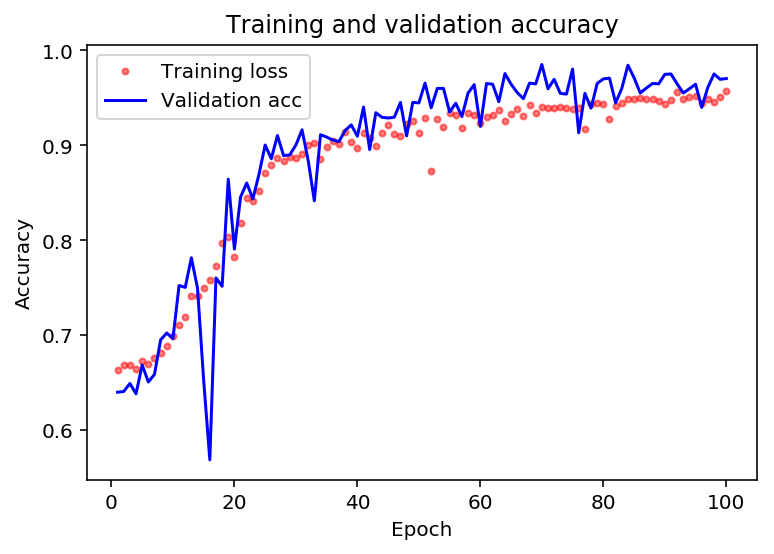

In [15]:
# Plot the learning curves with training and validation accuracy
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'ro', label='Training loss', alpha=0.5, markersize=3)
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

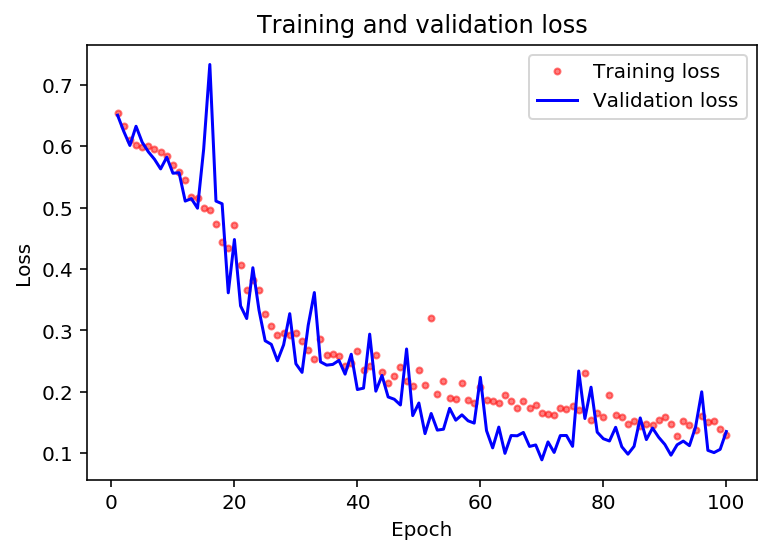

In [16]:
# Plot the learning curves with training and validation loss
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training loss', alpha=0.5, markersize=3)
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [17]:
# Load TEST and VALIDATION datasets into memory for ROC curves
from scipy import misc
import numpy as np

def read_examples(directory, positive=True, X=np.empty((0,101,101,3)), y=np.array([])):
    for cdir in os.listdir(directory):
        cpath = os.path.join(directory,cdir)
        cimage = misc.imread(cpath)
        cimage = cimage.reshape(1,101,101,3)/255
        if positive: y = np.concatenate((y,[1]))
        else: y = np.concatenate((y,[0]))
        X = np.append(X,cimage, axis=0)
    return (X, y)


(X_test, y_test) = read_examples(test_pos_dir, positive=True)
(X_test, y_test) = read_examples(test_neg_dir, positive=False, X=X_test, y=y_test)

(X_val, y_val) = read_examples(validation_pos_dir, positive=True)
(X_val, y_val) = read_examples(validation_neg_dir, positive=False, X=X_val, y=y_val)


In [18]:
# Evaluate the data to use to create ROC and PR curves
import numpy as np
y_pred_val = model.predict_proba(X_val).ravel()
y_pred_test = model.predict_proba(X_test).ravel()

558/558 [==============================] - 0s     


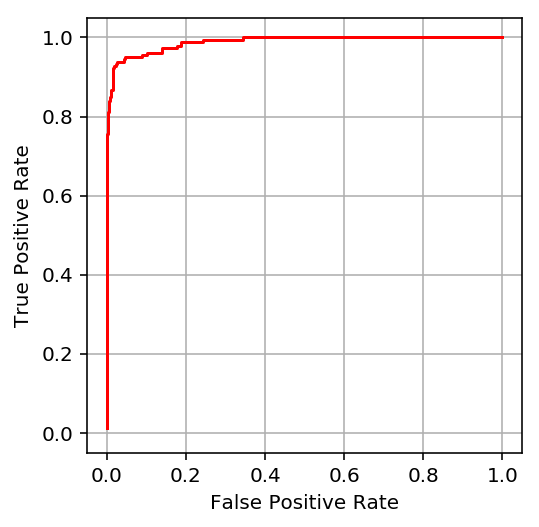

In [19]:
# Plot the ROC curve
from sklearn.metrics import roc_curve

fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
fpr_val, tpr_val, _ = roc_curve(y_val, y_pred_val)

plt.plot(fpr_test, tpr_test, color='red', label='Test')
# plt.plot(fpr_val, tpr_val, color='blue', label='Validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
dx = 0.05
plt.axis([0-dx, 1+dx, 0-dx, 1+dx ])
plt.gca().set_aspect('equal')
plt.show()

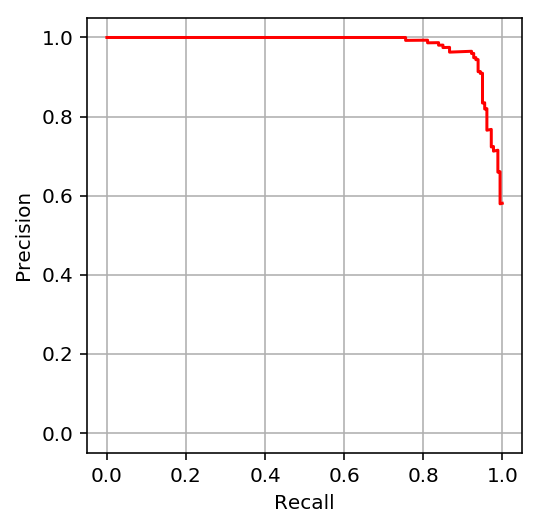

In [20]:
# Plot the PR Curve
from sklearn.metrics import precision_recall_curve
precision_test, recall_test, _ = precision_recall_curve(y_test, y_pred_test)
precision_val, recall_val, _ = precision_recall_curve(y_val, y_pred_val)

ax2 = plt.plot(recall_test, precision_test, color='red', label='Test')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
dx = 0.05
plt.axis([0-dx, 1+dx, 0-dx, 1+dx ])
plt.gca().set_aspect('equal')
plt.show()